In [1]:
#モジュールのインポート
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

#ドライブのマウント
drive.mount('/content/drive')

#共通のディレクトリパス
common_path = '/content/drive/MyDrive/img2025/image/'

Mounted at /content/drive


In [3]:
# 変換前後の画像を並べて表示する関数
def show_images(img1, img2, title1='Original', title2='Result', cmap='gray', vmin=0, vmax=255):
    plt.figure(figsize=(10, 5))

    # 変換前の画像を表示
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(img1, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')

    # 変換後の画像を表示
    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(img2, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# ヒストグラムを描画する関数
def plot_grayscale_histogram(image, title='Histogram'):
    # OpenCVでヒストグラムを計算
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # ヒストグラムを描画
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

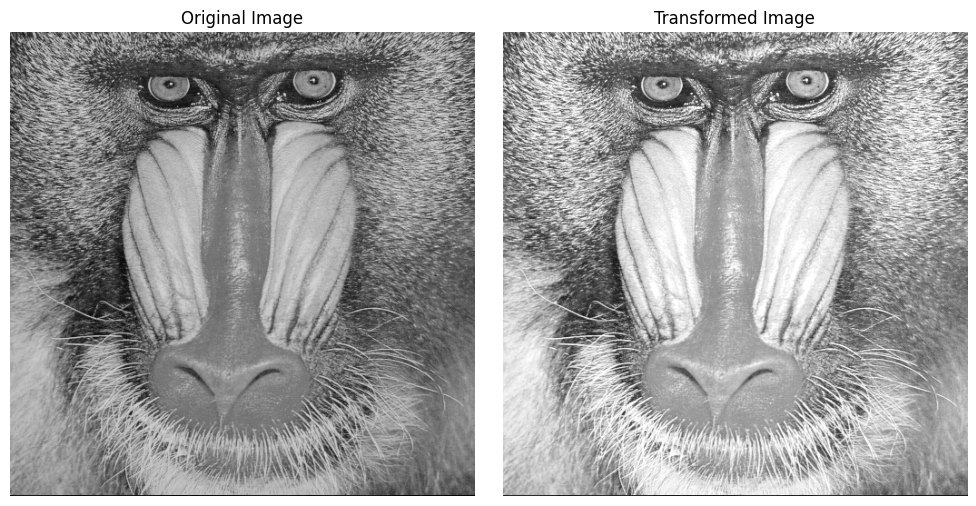

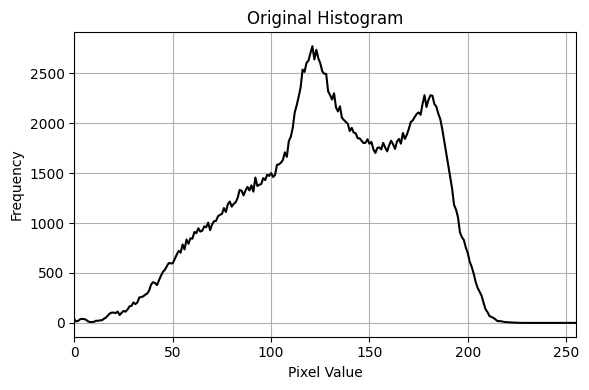

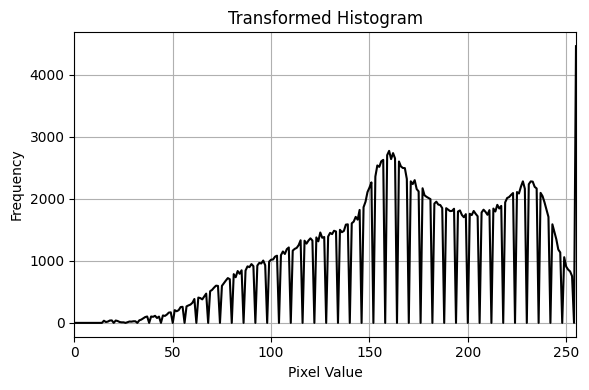

True

In [4]:
# ----------------------------------------------------------------
# 課題1: 線形変換による濃度変換
# ----------------------------------------------------------------

# 画像を読み込む
gray_img = cv2.imread(common_path + 'gray_image.png', cv2.IMREAD_GRAYSCALE)

# 出力用配列の初期化
H, W = gray_img.shape
adjusted_img = np.zeros((H, W), dtype=np.uint8)

# 画素ごとの濃度変換処理
# f: 入力画素値, g: 出力画素値
for y in range(H):
    for x in range(W):
        f = gray_img[y, x]

        # 変換式: f <= 200 なら 1.2f + 15, それ以外は 255
        if f <= 200:
            g = 1.2 * f + 15
        else:
            g = 255

        adjusted_img[y, x] = int(g)

# 結果画像を表示（関数を使用）
show_images(gray_img, adjusted_img, 'Original Image', 'Transformed Image')

# ヒストグラムを表示（関数を使用）
plot_grayscale_histogram(gray_img, 'Original Histogram')
plot_grayscale_histogram(adjusted_img, 'Transformed Histogram')

# 画像保存
cv2.imwrite('transformed_image.png', adjusted_img)

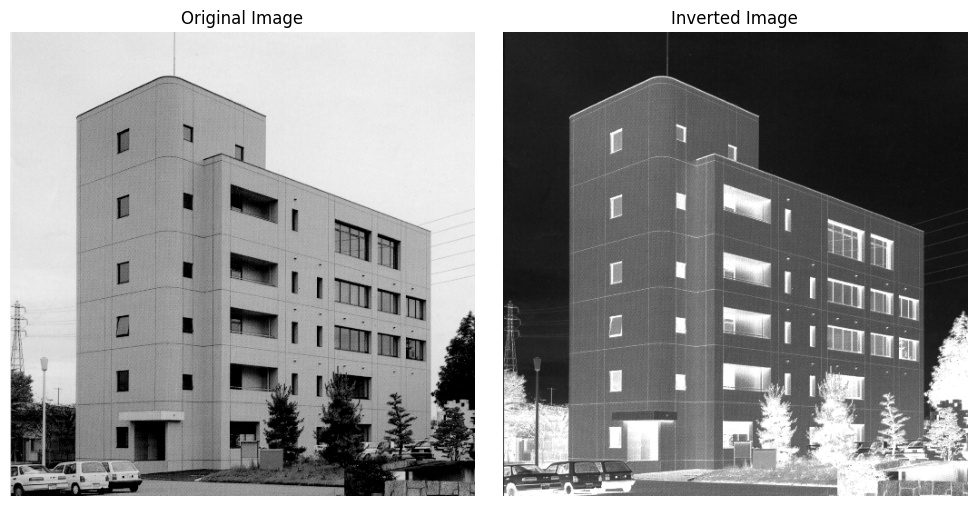

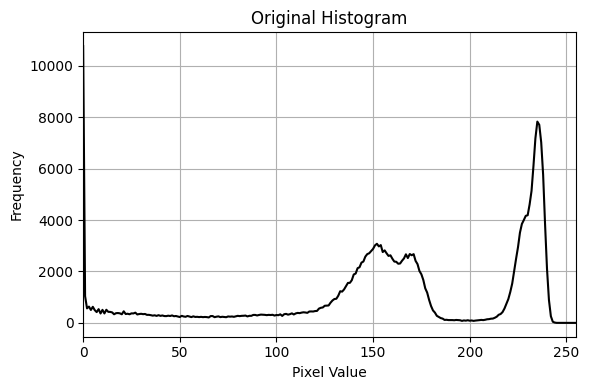

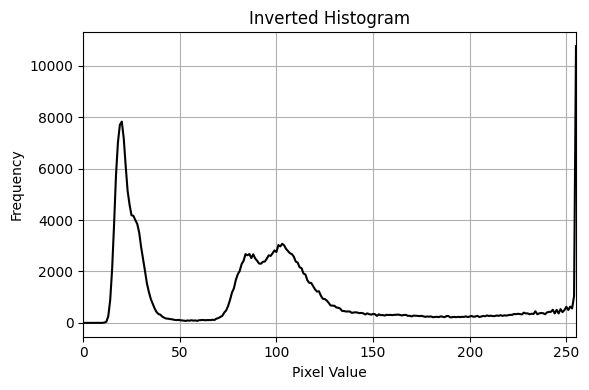

True

In [5]:
# ----------------------------------------------------------------
# 課題2: 輝度反転
# ----------------------------------------------------------------

# 画像を読み込む
gray_img = cv2.imread(common_path + 'building.png', cv2.IMREAD_GRAYSCALE)

# 線形変換関数による輝度変換 (反転: alpha=-1, beta=255)
adjusted_img = cv2.convertScaleAbs(gray_img, alpha=-1, beta=255)

# 結果画像を表示
show_images(gray_img, adjusted_img, 'Original Image', 'Inverted Image')

# ヒストグラムを表示
plot_grayscale_histogram(gray_img, 'Original Histogram')
plot_grayscale_histogram(adjusted_img, 'Inverted Histogram')

# 画像保存
cv2.imwrite('inverted_image.png', adjusted_img)

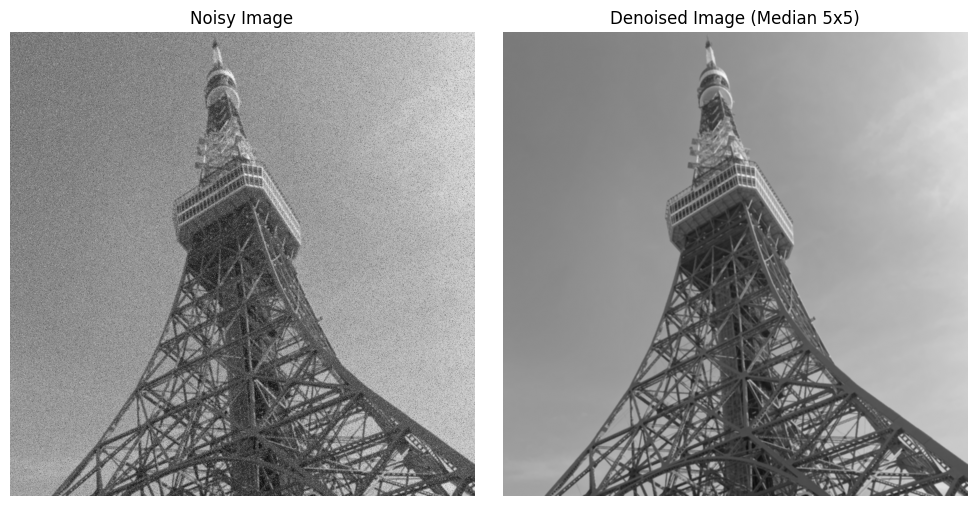

True

In [6]:
# ----------------------------------------------------------------
# 課題3: メディアンフィルタによるノイズ除去
# ----------------------------------------------------------------

# 画像の読み込み
noisy_img = cv2.imread(common_path + 'noisy_image.png', cv2.IMREAD_GRAYSCALE)

# メディアンフィルタの適用 (サイズ5)
median_img = cv2.medianBlur(noisy_img, 5)

# 実行結果の表示
show_images(noisy_img, median_img, 'Noisy Image', 'Denoised Image (Median 5x5)')

# 画像保存
cv2.imwrite(common_path + 'denoised_image.png', median_img)

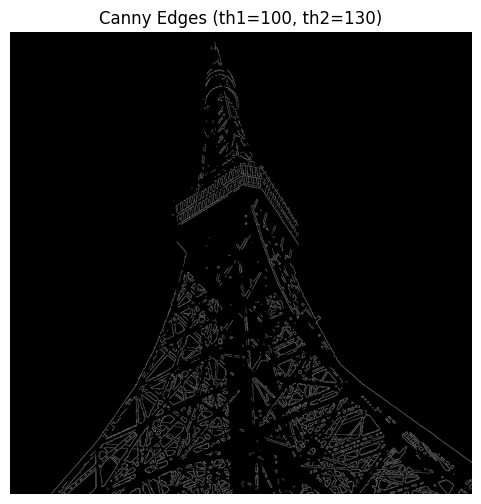

True

In [7]:
# ----------------------------------------------------------------
# 課題4: Canny法によるエッジ検出
# ----------------------------------------------------------------

# ノイズ除去済み画像の読み込み
src = cv2.imread(common_path + 'denoised_image.png', cv2.IMREAD_GRAYSCALE)

# しきい値の設定
threshold1 = 100
threshold2 = 130

# Cannyアルゴリズムを使用してエッジ検出を行う
canny_edges = cv2.Canny(src, threshold1, threshold2)

# 実行結果の画像を表示する
plt.figure(figsize=(6, 6))
plt.imshow(canny_edges, cmap='gray', vmin=0, vmax=255)
plt.title(f'Canny Edges (th1={threshold1}, th2={threshold2})')
plt.axis('off')
plt.show()

# 画像保存
cv2.imwrite(common_path + 'canny_edge_image.png', canny_edges)